## Office of the City Clerk of the City of Chicago

All Chicago residents driving, parking, leasing and/or owning a vehicle for which they are responsible in the City of Chicago are subject to the Chicago Wheel Tax and must purchase a Chicago City Vehicle Sticker.

Revenue from the Chicago City Vehicle Sticker Sales Program funds the repair and maintenance of more than 4,000 miles of Chicago streets. 

When residents do not purchase a Chicago City Vehicle Sticker, this non-compliance places a finanical stress on those that do comply and a physcial stress on the streets that are being used but not proportionally paid for the repair and mainteance. 

## Compliance Notification Program

During the Fall of 2019, the Office of the City Clerk, crossreferenced its own database of past compliant vehicle owners who were currently non-compliant with Illinois' Secretary of State database of registered vehicle owners.

This crossrefernce yieled a list of 1.5M drivers that who from January 2017 through October 2019 had at some point been compliant but for whatever reason were not currently compliannt with their vehicle sticker.

A number of these vehicles can be accounted for  when one accounts for the sale of a formerly compliant vehicle, the change in address of the vehicle's owner and/or the passing of the vehicle owner.

The decision was made to filter out as many of the 1.5M vehicle owners as possible before sending the remaining vehicle owners a costly piece of mail via USPS. We filtered out vehicle owners who would qualify as "Seniors" ( = or > 65 ) and "Veterans" because these types of vehicle owners either pay a reduced cost or qualify for a completely free vehicle sticker, respectively.

Additionally, the decision was made to filter out "Motorbikes", "Antique Vehicles" and "Trailers".  When these filterings continued to produce a high number of vehicles which would not be cost effective to send mail to via USPS, we finally decided to focus on vehicle owners who had just become non-compliant within the last three months. 

This filtering produced a more manageable list at 150K vehicle owners.

## Too Early To Tell Results

The Compliance Notification Program had a complinat response rate of ~ 3.2%.

(Additionally, we did find out that a small sample set that was notified by email instead of USPS had the same or  slightly higher response rate at 40% cost savings.

## The Challenge

The data of those who came in to compliance after receiving the initial notification now in hand, the Office would like to identify those most likely to come into compliance in order to run a cost effective program for fututre rounds of notification.

## The Data Science Workflow

## Frame-->Prepare-->Analyze-->Interpret-->Communicate

## Frame: Develop a hypothesis-driven approach to your analysis

Hypothesis: There are data points of vehicle owners that came into compliance after receiving a notification that can predict who will likely come into complaince in the future when receiving a similar notification.

## Prepare: Select, import, explore and clear the data

The original data set had 22 different features with Integers, Floats, and Strings. Since the features included full names and full addresses, I took great care to avoid targeting vehicle owners based on features that could be linked to their socio-economic status thus producing an analysis and data model made up of of solely vulnerable communities.





## Initial Obeservations of the data

~14% of non-compliant vehicles were of the Chevrolet model 
~ 3% of non-compliant vehicles were of the Civic make
both the highest percentage in their respective categories

The majority of the vehicle owners who came in to compliance after receiving the compliance notification did so in the last three days of the month.

The vehicle models most likely to come back into compliance were an even mix of American and Japanese models.

The Zip Codes most likely to come back into compliance were an exact mirror of each other but on opposite sides of the City. The Zip Codes most likely to come into compliance were neighborhoods made up of single family homes with a household income of less than $100K.

Features I willingly dropped: Full Name, Street Address, VIN, License Plate Number, various other departmental data points

Features I unwillingly dropped because of time or lack or ability: Latitiude, Longitude, Vehicle Make

## Analyze: Structure, visualize and complete your analysis

In [78]:
import pandas as pd
print(pd.__version__)

1.0.1


In [79]:
ComplianceModel = pd.read_csv ('DS_Final_Project_Data.csv')

<Figure size 360000x360000 with 0 Axes>

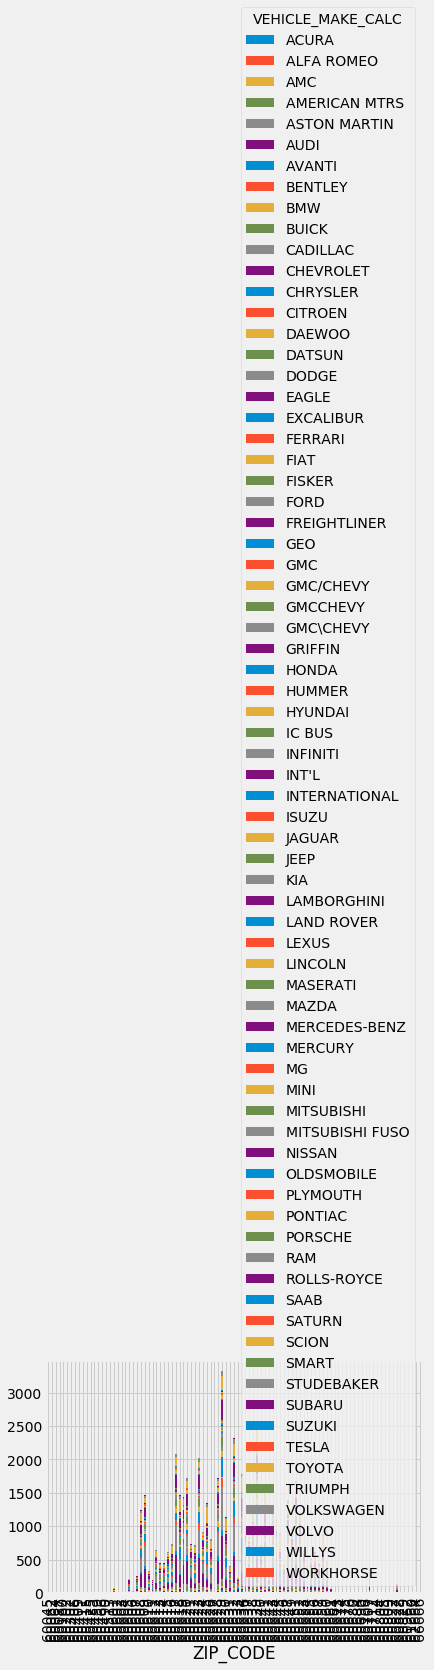

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(5000,5000))


ComplianceModel.groupby(['ZIP_CODE','VEHICLE_MAKE_CALC']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

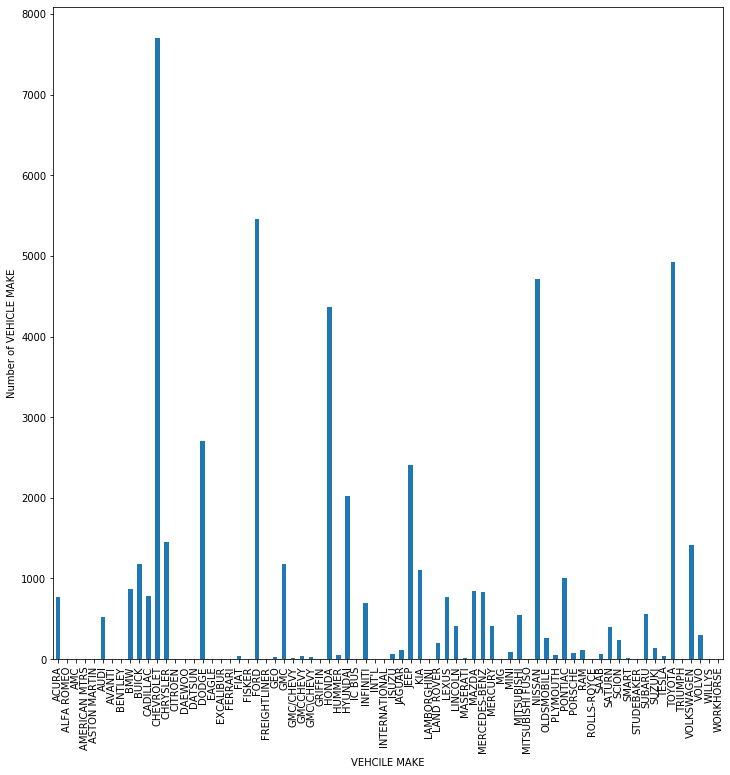

In [6]:
ComplianceModel.VEHICLE_MAKE_CALC.value_counts().sort_index().plot(kind='bar', figsize=(12,12));
plt.xlabel('VEHCILE MAKE');
plt.ylabel('Number of VEHICLE MAKE');

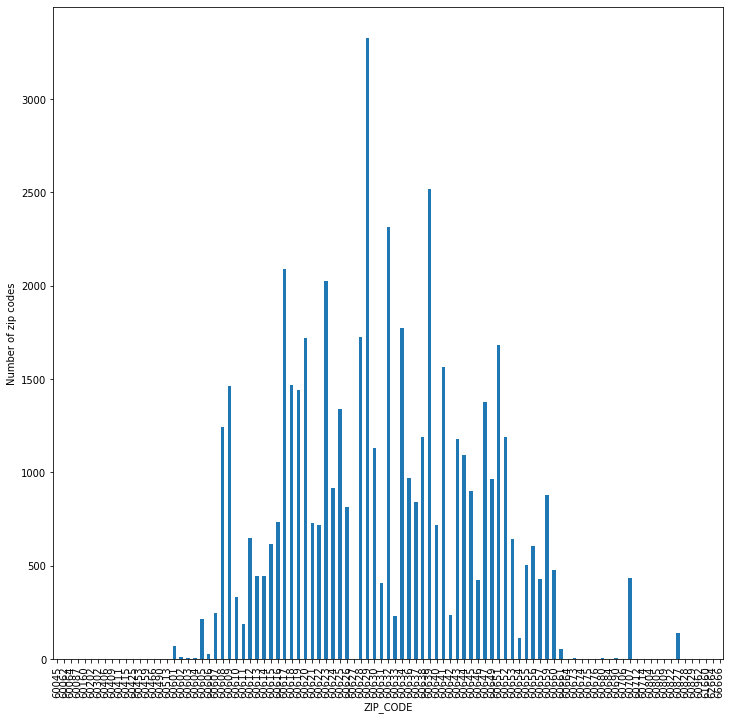

In [7]:
ComplianceModel.ZIP_CODE.value_counts().sort_index().plot(kind='bar', figsize=(12,12));
plt.xlabel('ZIP_CODE');
plt.ylabel('Number of zip codes');

## Original Features

In [16]:
ComplianceModel.tail(10)

,VEHICLE_MAKE_CALC,VEHICLE_MODEL_CALC,REG_VIN,ZIP_CODE,LAST_CVL_DATE,REF_REGISTRATION_EXP,Date became compliant
52034,FIAT,500X,ZFBCFXDT6GP388994,60609,1-Aug-19,1-Mar-20,NaN
52035,FIAT,500X,ZFBCFYAB4HP551595,60653,1-Aug-19,1-Nov-19,NaN
52036,FIAT,500X,ZFBCFYAB4JP655218,60618,1-Aug-19,1-Mar-20,6-Feb-20
52037,FIAT,500X,ZFBCFYDT0GP333044,60639,1-Jul-19,1-Feb-20,NaN
52038,FIAT,500X,ZFBCFYDT2GP394572,60620,1-Apr-19,1-Nov-19,NaN
52039,RAM,PROMASTER CITY CARGO,ZFBERFAB4H6E24276,60655,20-Aug-19,1-Aug-20,NaN
52040,RAM,PROMASTER CITY WAGON,ZFBERFBT5F6194927,60656,1-Aug-19,1-Mar-20,NaN
52041,FERRARI,F430,ZFFEW59AX60146560,60645,7-Dec-18,1-Jul-20,NaN
52042,LAMBORGHINI,GALLARDO,ZHWGU22N38LA05804,60611,4-Sep-19,NaN,19-Feb-20
52043,MASERATI,LEVANTE,ZN661XUL9JX301989,60631,4-Sep-19,1-Dec-19,NaN


I overwrit and converted the Last CVL Date column to a datetime series.

I split the datetime series into Expriation Month and Expriation Year

I converted the NaN values in the "Date became compliant" to a (7) and those with valuess to an (8) signifying no-action taken to become compliant and action taken to become compliant.

I initially hashed bothe the Vehicle Make and Vehicle Model columns. Unfortunately, during this last week I had to switch from a Mac to a PC and was never able to successfully install the library needed to hash on to the PC.

This led to my dropping the Vehicle Model column and mapping Vehicle Makes to numbers. I did this based on the value counts of the Vehicle Make column.



In [81]:
ComplianceModel['LAST_CVL_DATE'] = pd.to_datetime(ComplianceModel.LAST_CVL_DATE)
ts = pd.to_datetime ('1/2017')
ts

ComplianceModel = ComplianceModel.rename(columns={'LAST_CVL_DATE': 'STICKER_EXPIRATION'})
ComplianceModel['STKR_EXP_MONTH'] = ComplianceModel['STICKER_EXPIRATION'].dt.month
ComplianceModel['STKR_EXP_YEAR'] = ComplianceModel['STICKER_EXPIRATION'].dt.year

ComplianceModel['STKR_EXP_YEAR_NUM'] = ComplianceModel.STKR_EXP_YEAR.map({2017:0, 2018:1, 2019:2})
ComplianceModel.drop(['STICKER_EXPIRATION' ],  inplace=True, axis=1)
ComplianceModel.drop(['STKR_EXP_YEAR' ],  inplace=True, axis=1)

In [82]:
ComplianceModel = ComplianceModel.rename(columns={'Date became compliant': 'Compliant'})
ComplianceModel[['Compliant']] = ComplianceModel[['Compliant']].fillna(value=7)
ComplianceModel.drop(['REG_VIN', 'REF_REGISTRATION_EXP' ],  inplace=True, axis=1)

In [83]:
ComplianceModel.replace('19-Feb-20', 8, inplace=True)
ComplianceModel.replace('28-Jan-20', 8, inplace=True)
ComplianceModel.replace(['31-Jan-20', '30-Jan-20', '29-Jan-20'], 8, inplace=True)
ComplianceModel.replace(['3-Feb-20', '5-Feb-20', '4-Feb-20'], 8, inplace=True)
ComplianceModel.replace(['27-Jan-20', '7-Jan-20', '9-Jan-20'], 8, inplace=True)
ComplianceModel.replace(['8-Jan-20', '15-Jan-20', '22-Jan-20'], 8, inplace=True)
ComplianceModel.replace(['10-Jan-20', '14-Jan-20', '24-Jan-20'], 8, inplace=True)
ComplianceModel.replace(['6-Jan-20', '21-Jan-20', '13-Jan-20'], 8, inplace=True)
ComplianceModel.replace(['17-Jan-20', '16-Jan-20', '11-Jan-20'], 8, inplace=True)
ComplianceModel.replace(['25-Jan-20', '18-Jan-20', '23-Jan-20'], 8, inplace=True)
ComplianceModel.replace(['26-Jan-20', '20-Jan-20','12-Jan-20', '19-Jan-20'], 8, inplace=True)
ComplianceModel.replace(['1-Feb-20', '6-Feb-20', '7-Feb-20', '10-Feb-20','11-Feb-20', '8-Feb-20','12-Feb-20','13-Feb-20',], 8, inplace=True)
ComplianceModel.replace(['18-Feb-20', '14-Feb-20', '2-Feb-20', '15-Feb-20','20-Feb-20', '17-Feb-20','9-Feb-20','16-Feb-20',], 8, inplace=True)

In [53]:
ComplianceModel.tail(5)

,VEHICLE_MAKE_CALC,VEHICLE_MODEL_CALC,ZIP_CODE,Compliant,STKR_EXP_MONTH,STKR_EXP_YEAR_NUM
52039,RAM,PROMASTER CITY CARGO,60655,7,8,2
52040,RAM,PROMASTER CITY WAGON,60656,7,8,2
52041,FERRARI,F430,60645,7,12,1
52042,LAMBORGHINI,GALLARDO,60611,8,9,2
52043,MASERATI,LEVANTE,60631,7,9,2


In [84]:
ComplianceModel[['ZIP_CODE']] = ComplianceModel[['ZIP_CODE']].fillna(value=60629)
ComplianceModel['ZIP_CODE'].astype('int64')
ComplianceModel['ZIP_CODE'] = ComplianceModel['ZIP_CODE'].astype('int64')

In [85]:
ComplianceModel['Compliant'].astype('int64')
ComplianceModel['Compliant'] = ComplianceModel['Compliant'].astype('int64')

In [86]:
ComplianceModel['VEHICLE_MAKE'] = ComplianceModel.VEHICLE_MAKE_CALC.map({'CHEVROLET':0, 'FORD':1, 'TOYOTA':2, 'NISSAN':3, 'HONDA':4, 'DODGE':5, 'JEEP':6, 'HYUNDAI':7, 'CHRYSLER':8, 'VOLKSWAGEN':9, 'GMC':10})

In [87]:
ComplianceModel = ComplianceModel.dropna(subset=['VEHICLE_MAKE'])

In [88]:
ComplianceModel.drop(['VEHICLE_MAKE_CALC' ],  inplace=True, axis=1)

In [89]:
ComplianceModel = ComplianceModel[["VEHICLE_MAKE", "VEHICLE_MODEL_CALC", "ZIP_CODE", "STKR_EXP_MONTH", "STKR_EXP_YEAR_NUM", "Compliant"]]

In [90]:
ComplianceModel['VEHICLE_MAKE'].astype('int64')
ComplianceModel['VEHICLE_MAKE'] = ComplianceModel['VEHICLE_MAKE'].astype('int64')
ComplianceModel.drop(['VEHICLE_MODEL_CALC' ],  inplace=True, axis=1)

In [61]:
ComplianceModel.tail(10)

,VEHICLE_MAKE,ZIP_CODE,STKR_EXP_MONTH,STKR_EXP_YEAR_NUM,Compliant
52003,6,60641,9,2,7
52004,6,60639,9,2,7
52005,6,60623,5,2,7
52006,6,60630,9,2,7
52007,6,60646,3,2,8
52008,6,60641,5,2,7
52009,6,60646,4,2,7
52010,6,60633,5,2,7
52011,6,60605,9,2,7
52012,6,60655,10,2,7


## KNN Data Model to predict Vehicle Owners most likely to come in to compliance

In [91]:
# Using the Train/Test Split Procedure (K=1

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [92]:
# Create feature matrix (X).
feature_cols = ['VEHICLE_MAKE', 'ZIP_CODE', 'STKR_EXP_MONTH', 'STKR_EXP_YEAR_NUM']
X = ComplianceModel[feature_cols]

In [93]:
# Create response vector (y).
y = ComplianceModel.Compliant

In [108]:
# Step 1: Split X and y into training and testing sets (using random_state for reproducibility).
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=500)

In [109]:
# Step 2: Train the model on the training set (using K=1).
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [110]:
# Step 3: Test the model on the testing set and check the accuracy.
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9370111586192512


In [111]:
# Repeating for K=50.
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9698612994055689


In [119]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)
    
 

In [113]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,training error,testing error
K,,
100,0.030558,0.030139
99,0.030558,0.030139
98,0.030558,0.030139
97,0.030558,0.030139
96,0.030558,0.030139


In [114]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

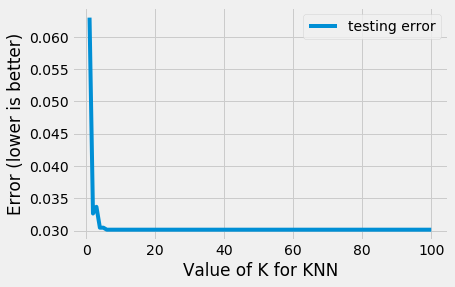

In [115]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

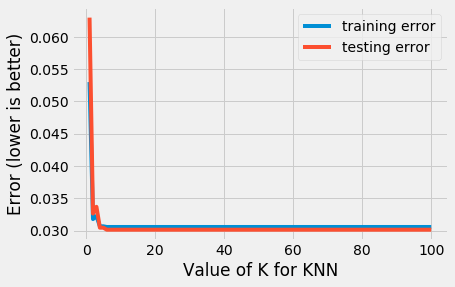

In [116]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');


    Training error decreases as model complexity increases (lower value of K).
    Testing error is minimized at the optimum model complexity.

## Conclusion: Since both errors are plateauing, this model is likely underfitting (i.e.,not complex enough).



## Run KNN Model and Score

A confusion matrix, also known as an error matrix, is a performance measurement for assessing classification models. 

Accuracy: equal to the fraction of predictions that a model got right.
Recall: attempts to answer “What proportion of actual positives was identified correctly?”
Precision: attempts to answer “What proportion of positive identifications was actually correct?”

In [129]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.9698613, 0.       ])

The F1 score is a measure of a test’s accuracy — it is the harmonic mean of precision and recall. It can have a maximum score of 1 (perfect precision and recall) and a minimum of 0. Overall, it is a measure of the preciseness and robustness of your model.

In [130]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

C:\Users\vazqu\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.98470009, 0.        ])

## Logistic Regression Model to predict Vehicle Owners mostly likely to come into compliance

In [55]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

## Using Logistic Regression for Classification


In [120]:
features = ['VEHICLE_MAKE','ZIP_CODE','STKR_EXP_MONTH','STKR_EXP_YEAR_NUM','Compliant']
ComplianceModel_a =  ComplianceModel[features]
ComplianceModel_md1 = pd.get_dummies(ComplianceModel_a[['VEHICLE_MAKE','ZIP_CODE','STKR_EXP_MONTH','STKR_EXP_YEAR_NUM','Compliant']], drop_first = True)


ComplianceModel
# no hyper parameters for first model
LogReg1 = LogisticRegression()

# X and y features
X1 = ComplianceModel_md1.drop('Compliant', axis =1)
y1 = ComplianceModel_md1['Compliant']



# using train test split to cross val
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,y1, random_state =42)

# fit model
LogReg1.fit(x_train1, y_train1)

C:\Users\vazqu\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
name = ComplianceModel_md1.columns.drop('Compliant')

coef = LogReg1.coef_[0]

pd.DataFrame([name,coef],index = ['Name','Coef']).transpose()

,Name,Coef
0,VEHICLE_MAKE,-1.68966e-06
1,ZIP_CODE,-5.69234e-05
2,STKR_EXP_MONTH,3.48269e-05
3,STKR_EXP_YEAR_NUM,4.4784e-06


The Year the vehicle came out of compliance carries that largest coef.

In [122]:
# predict with model
y_pred = LogReg1.predict(x_test1)

## Run Logistic Regression Model and Score

Positive coefficients increase the log odds of the response (and thus increase the probability), and negative coefficients decrease the log odds of the response (and thus decrease the probability).

In [123]:
metrics.accuracy_score(y_test1,y_pred)

0.9699655855667952

The distribution of the class is off this may have lead to such a high accuracy score.

A confusion matrix, also known as an error matrix, is a performance measurement for assessing classification models.

Accuracy: equal to the fraction of predictions that a model got right. Recall: attempts to answer “What proportion of actual positives was identified correctly?” Precision: attempts to answer “What proportion of positive identifications was actually correct?”


In [127]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, y_pred)# Accuracy



array([[9301,    0],
       [ 288,    0]], dtype=int64)

Confusion Matrix

There are 9,301 True Negatives and 288 False Negatives. The model is likely selecting vehicle owner is always non-compliant !!!


In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1, y_pred)# Recall
from sklearn.metrics import recall_score
recall_score(y_test1, y_pred, average=None)# Precision
from sklearn.metrics import precision_score
precision_score(y_test1, y_pred, average=None)

array([0.96996559, 0.        ])

In [105]:
metrics.roc_auc_score(y_test1,y_pred)

0.5

In [131]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(y_test1, y_pred, average=None)

array([0.98475384, 0.        ])

## Interpret: Create recommendations and business decisions from your data.



## Based on the data and its analysis I recommend the following:

## Business decisions:

(1) Chevrolet, Ford, Nissan, Toyota and Dodge vehicles should be the vehicles we identify

(2) The 60629 and 60639 Zip Codes should be the areas we target

(3) We should deliver notices via email (if available) then USPS

(4) This action should be undertaken in August, September and October of the calendar year

## Data Model Recommendations:

(1) Hash Vehicle Make and Vehicle Model

(2) Import latest data from mid-February through March 2020 for analysis.

(3) The features of Vehicle Make and Latitude/Longitude should be added to fine tune/build any future model

## Communicate: Present insights from data to different audiences

Next Steps: 

(a) present current insights to Office of the City Clerk

(b) draft formal report